# Gridding

This notebook illustrates the different image gridding procedures in the GridSamp toolbox. In addition, a visualisation is provided to illustrate the main grid overlays. Start by loading the necessary modules.

In [1]:
# LOAD MODULES
from PIL import Image
import matplotlib.pyplot as plt
import os

In [2]:
# LOAD IAM

# Change directory to that of IAM to load it
os.chdir(r'C:\Users\u0154823\OneDrive - KU Leuven\Desktop\PhD\0 Preparation\0.2 IAM toolbox\IAM toolbox\source-code\image-aesthetic-map-toolbox')

# Open IAM toolbox
from grid_samp import Node, ImageRegion, Tree
from grid_samp.grids import FixedGrid, RecursiveGrid, ImageRegionBasedGrid
from grid_samp.assemble import ROI, ImageRegionIntersectionHeatmap, Mosaic, Contextualize

# Set environment to current environment
os.chdir("Tutorials")

GridSamp offers three main gridding procedures (fixed grid, recursive grid, and free-grid), explained in more detail in the accompanying manuscript. All gridding procedures take a `PIL.Image()` object as input and return a list of `Patch` objects as output for further use. The three gridding procedures are:
* Fixed grids
* Recursive grids
* Image region based grids

## Fixed grid
In a fixed grid, the number of columns and rows of the grid are set. These reflect the number image regions that are extracted along the height and width of the image. The image is divided in image regions by dividing the height into 15 equal parts and the width into 20 equal parts. All image regions are equally sized.

In [3]:
#---------------------#
# Generating the grid #
#---------------------#

# Load example image
image = 'example img.jpg'
image = Image.open(image)
image_region_index = 11

fixed_grid15_12 = FixedGrid(image = image, n_rows = 15, n_cols = 20)
fixed_grid15_12_image_region = fixed_grid15_12.get_image_region(image_region_index)
fixed_grid15_12_image_region.extract_from_image(image)

fixed_grid15_12_image_region

ImageRegion Object

In [6]:
#----------------------#
# Visualising the grid #
#----------------------#

# Generate region of interest overlays
fixed_grid15_12 = ROI.generate(image, fixed_grid15_12)

# Plot the original image with ROI lines to visualise the grid
plt.imshow(recursive_grid_level_2)
plt.title('15 x 20 grid')
plt.axis('off')


# Adjust layout for better visualization
plt.tight_layout()
plt.show()

TypeError: 'FixedGrid' object is not iterable

## Recursive grid

In a recursive grid, `Image_Region` objects are extracted from the `Image` object by recursivelly halving its dimensions. This is done by first initialising a `Tree()` of the image and then dividing the Tree into image regions using `decompose()`. The division is done by halving the height and width of the image, so by splitting the image into quadrants. This division is applied recursivelly so that each quadrant is recursivelly split into smaller quadrants. The recursion number is set using the `target_level` parameter. Each level in the recursion can be accessed seperatly by setting the `target_level` in `get_level_patches`.

In [8]:
#---------------------#
# Generating the grid #
#---------------------#

# Load example image
image = 'example img.jpg'
image = Image.open(image)

# Initialize tree
tree = Tree(image)
tree.decompose(decomposition = RecursiveGrid, target_level = 3)

# Access the patches at the third recursion level
level_2_image_regions = tree.get_level_Image_Regions(target_level = 2)
level_3_image_regions = tree.get_level_Image_Regions(target_level = 3)

# Show output
print(level_2_image_regions)
print(level_3_image_regions)

[ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object]
[ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object]


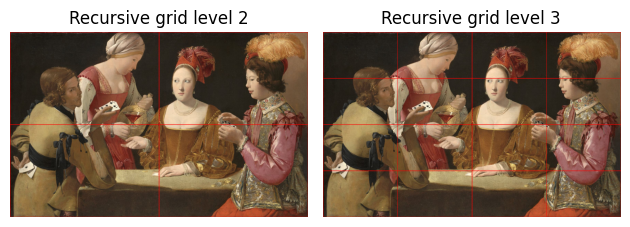

In [9]:
#----------------------#
# Visualising the grid #
#----------------------#

# Generate region of interest overlays
recursive_grid_level_2 = ROI.generate(image, level_2_image_regions)
recursive_grid_level_3 = ROI.generate(image, level_3_image_regions)   

# Plot the original image with ROI lines to visualise the grid
plt.subplot(1, 2, 1)
plt.imshow(recursive_grid_level_2)
plt.title('Recursive grid level 2')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(recursive_grid_level_3)
plt.title('Recursive grid level 3')
plt.axis('off')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

The recursive indexing leads to a somewhat awkward indexing.

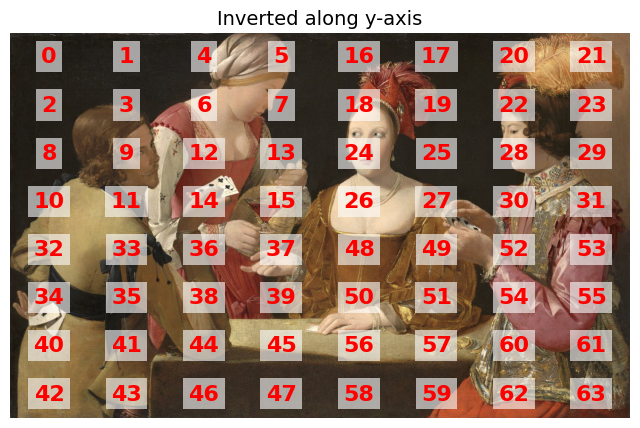

In [ ]:

# Create initial image region and grid
image_region = ImageRegion.from_image(image)
recursive_grid = RecursiveGrid(image_region, recursion_depth=4)

# Get recursion level 1 regions
level_2_regions = recursive_grid.get_recursion_level_images(recursion_level=3)
# After generating the final image
after_shuffle_2 = Mosaic.generate(image, level_2_regions, margin=0)

# Plot the image with region indices
plt.figure(figsize=(8, 8))
plt.imshow(after_shuffle_2)
plt.title("Inverted along y-axis", color="black", fontsize=14)
plt.axis('off')

# Add region index at the center of each region
for idx in range(64):
    region = level_2_regions.get(idx)
    x_center, y_center = region.get_center()
    
    plt.text(
        x_center, y_center, str(idx),
        color='red', fontsize=16, fontweight='bold',
        ha='center', va='center', bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
    )

plt.show()


## Free grid

In [16]:
#---------------------#
# Generating the grid #
#---------------------#

# Load example image
image = 'example img.jpg'
image = Image.open(image)

# Define anchor patch locations
x, y, w, h = (40, 750, 120, 120)

# Extract anchor patch
image_region = ImageRegion(x, y, w, h)

# generate grid based on anchor patch
free_grid_image_regions = ImageRegionBasedGrid.generate(image_region, image) # Generate patch

# Show output
print(free_grid_image_regions)


[ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object, ImageRegion Object,

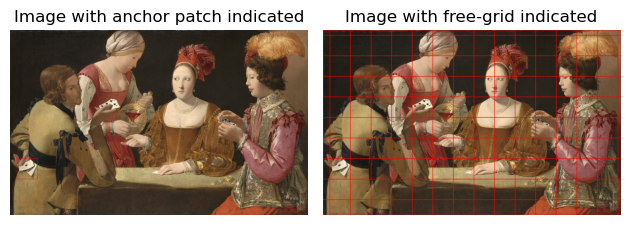

In [19]:
#----------------------#
# Visualising the grid #
#----------------------#

anchor_patch = ROI.generate(image, image_region)
free_grid = ROI.generate(image, free_grid_image_regions)

# Plot the original image with ROI lines to visualise the grid
plt.subplot(1, 2, 1)
plt.imshow(anchor_patch)
plt.title('Image with anchor patch indicated')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(free_grid)
plt.title('Image with free-grid indicated')
plt.axis('off')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()